In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [2]:
titanic= pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##12 columns ( 5 objects 5 integer and 2 float )

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.Cabin.isnull().sum()

687

## 687 null of 891

In [ ]:
titanic.Cabin.notnull().sum()

204

## 204 notnull of 891

#HANDLING MISSING VALUES

In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 177 missing values in age  687 missing values in cabin and 2 missing values in embarked
##.
##.
##.
##.
## handle missing values by 2 ways ( drop/ fill missing values by the mean)
##

<Axes: >

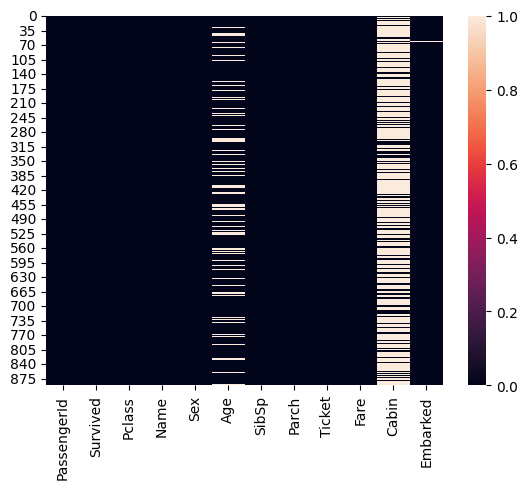

In [8]:
sns.heatmap(titanic.isnull  ())

##Drop embarked and cabin since that they will not affect our dataset

In [9]:
titanic.drop(['Embarked','Cabin'], axis = 1 ,inplace=True)

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

##we will fill the age column with the median since that age will affect our dataset

In [11]:
titanic.Age.fillna(titanic.Age.median(),inplace=True)

In [12]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

<Axes: >

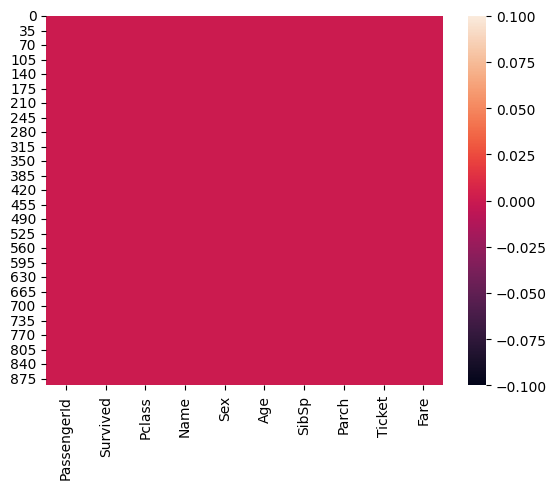

In [13]:
sns.heatmap(titanic.isnull  ())

##solid heatmap means that there is no null values

#Clean Data

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


##we dont need the (name,fare,ticket) columns they will not affect our dataset

In [15]:
titanic.drop(['Name','Fare','Ticket'],axis=1,inplace=True)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [17]:
titanic.shape

(891, 7)

#Data Visualization

In [18]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

##549 not survived and only 342 survived

In [19]:
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

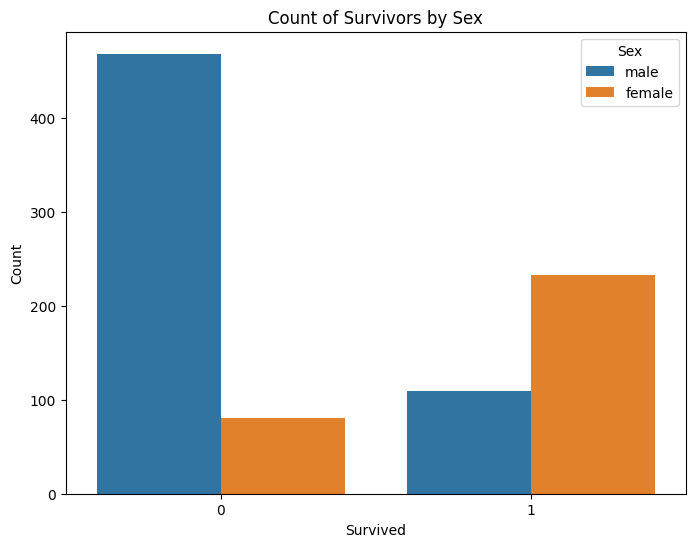

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Survived", hue="Sex", data=titanic)

# Add labels and title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Count of Survivors by Sex")

# Display the plot
plt.show()

##female survived more than male

<Axes: xlabel='Age', ylabel='Count'>

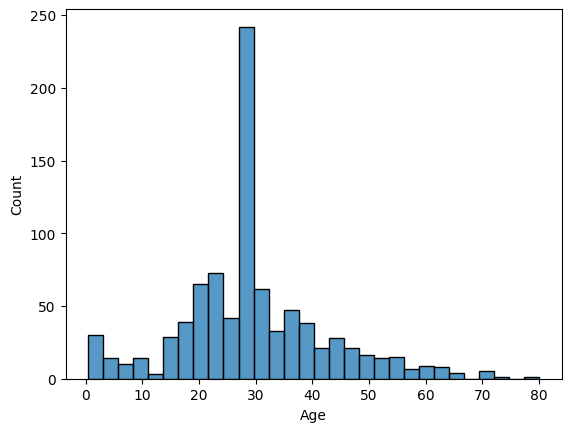

In [27]:
sns.histplot(titanic.Age)

##most of people are from 28 to 30 years old

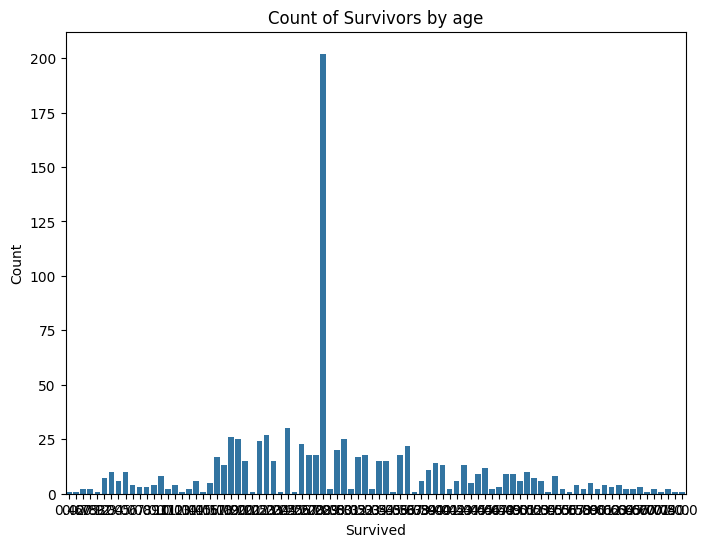

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Age", data=titanic)

# Add labels and title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Count of Survivors by age")

# Display the plot
plt.show()

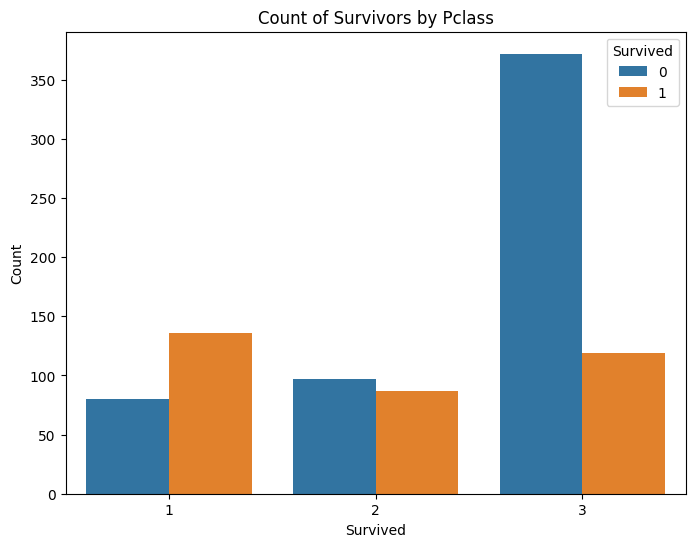

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Pclass", hue="Survived", data=titanic)

# Add labels and title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Count of Survivors by Pclass")

# Display the plot
plt.show()

##most of the non survived people are from the 3rd pclass and most of the survived passengers are from the 1st pclass

# Data Transformation

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


##converting (sex) string "object" into integer

In [29]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0


## we convert male into {0} female into{1}

In [31]:
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
886,887,0,2,0,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,28.0,1,2
889,890,1,1,0,26.0,0,0
890,891,0,3,0,32.0,0,0


##convert age from float into integer

In [32]:
titanic['Age']=titanic['Age'].astype(int)

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22,1,0
1,2,1,1,1,38,1,0
2,3,1,3,1,26,0,0
3,4,1,1,1,35,1,0
4,5,0,3,0,35,0,0


##we convert age from float into integer
#Now our data is read for the machine learning step

#Create Models

In [34]:
x=titanic.drop('Survived',axis=1)
y=titanic.Survived

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
model1=DecisionTreeClassifier()
model2=GaussianNB()
model3=KNeighborsClassifier()
model4=LogisticRegression()
model5=RandomForestClassifier()
model6=SVC()

#Decision tree model

##function for all the models at once

In [67]:
Allaccuracy=[]

In [68]:
def models(model):
  model.fit(x_train,y_train)
  predict=model.predict(x_test)
  accuracy=accuracy_score(predict,y_test)
  print('accuracy is',accuracy)
  Allaccuracy.append(accuracy)

In [69]:
models(model1) #Decision tree

accuracy is 0.7150837988826816


In [70]:
models(model2) #naive

accuracy is 0.7653631284916201


In [71]:
models(model3) #KNN

accuracy is 0.5307262569832403


In [72]:
models(model4) #logistic

accuracy is 0.8100558659217877


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
models(model5) #random forest

accuracy is 0.8212290502793296


In [74]:
models(model6) #svm

accuracy is 0.5865921787709497


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       105
           1       0.67      0.68      0.67        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



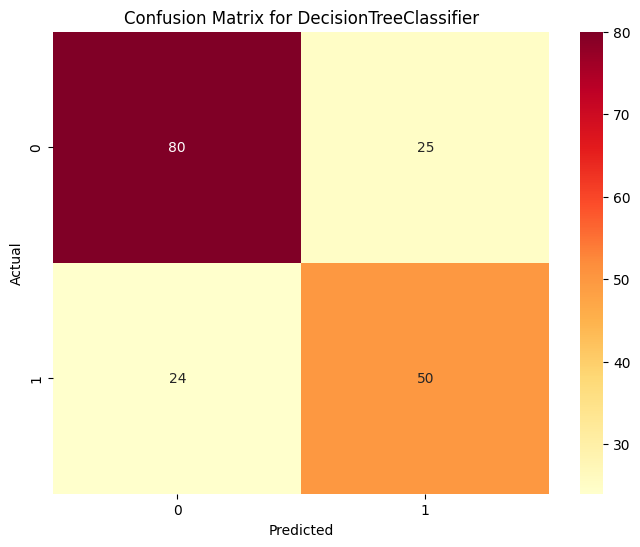

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.70      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



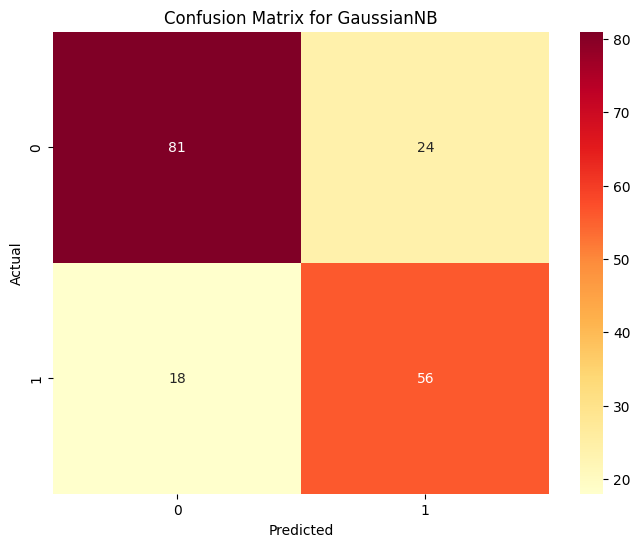

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       105
           1       0.38      0.22      0.28        74

    accuracy                           0.53       179
   macro avg       0.48      0.48      0.46       179
weighted avg       0.50      0.53      0.50       179



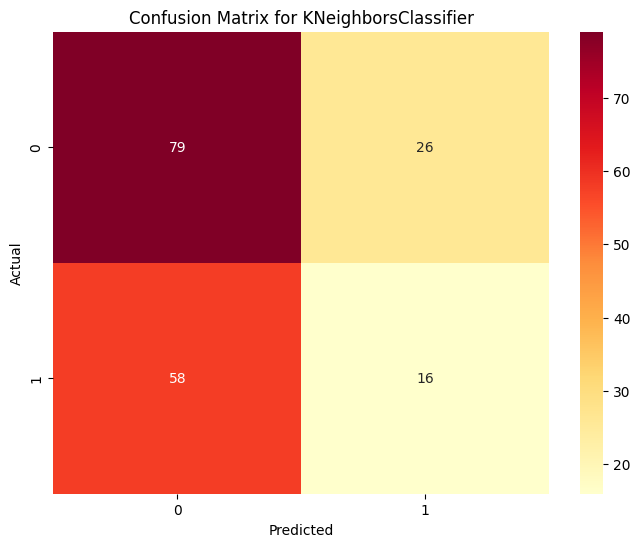

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



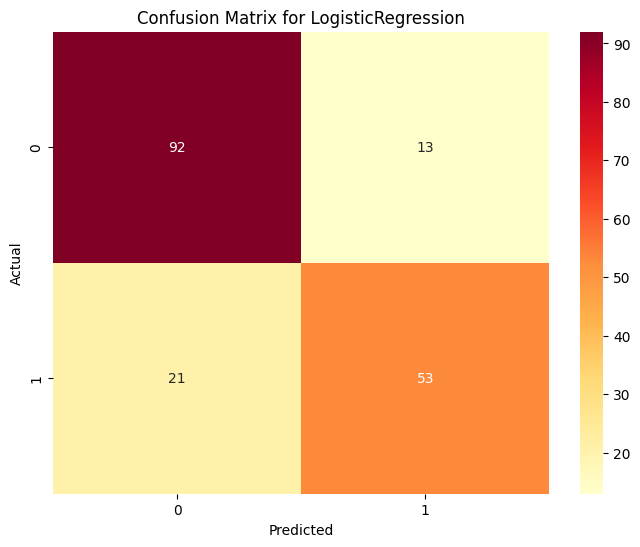

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



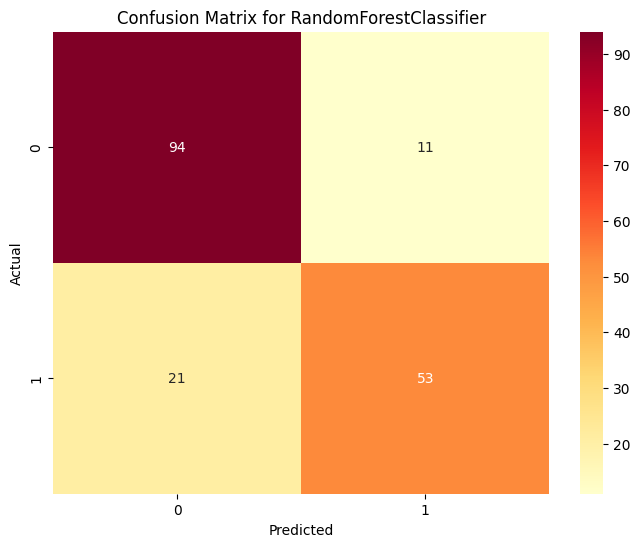

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


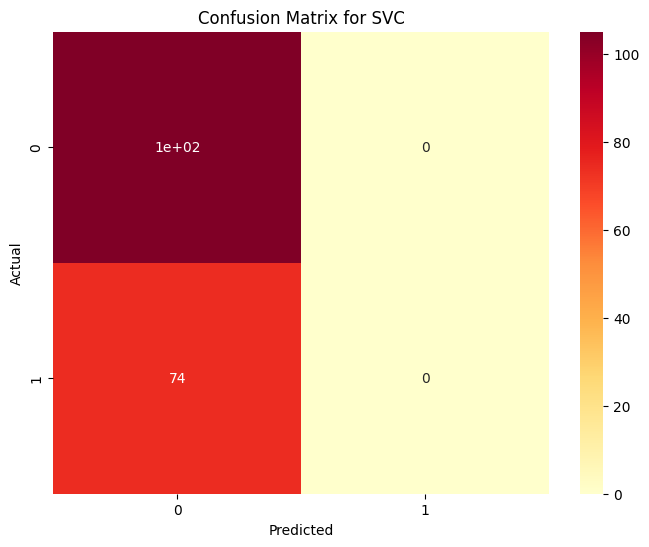

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def models(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Classification report
    print(f"Classification Report for {type(model).__name__}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='YlOrRd')
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Usage
model1 = DecisionTreeClassifier()
model2 = GaussianNB()
model3 = KNeighborsClassifier()
model4 = LogisticRegression()
model5 = RandomForestClassifier()
model6 = SVC()

models(model1, x_train, y_train, x_test, y_test)
models(model2, x_train, y_train, x_test, y_test)
models(model3, x_train, y_train, x_test, y_test)
models(model4, x_train, y_train, x_test, y_test)
models(model5, x_train, y_train, x_test, y_test)
models(model6, x_train, y_train, x_test, y_test)

In [75]:
Allaccuracy

[0.7150837988826816,
 0.7653631284916201,
 0.5307262569832403,
 0.8100558659217877,
 0.8212290502793296,
 0.5865921787709497]

In [76]:
# Assuming you have a list of accuracies

# Create a list of algorithm names
algorithms = ['DecisionTreeClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier','SVC']
# Create the table
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Algorithm', 'Accuracy']

for i, algo in enumerate(algorithms):
    table.add_row([algo, Allaccuracy[i]])

print(table)

+------------------------+--------------------+
|       Algorithm        |      Accuracy      |
+------------------------+--------------------+
| DecisionTreeClassifier | 0.7150837988826816 |
|       GaussianNB       | 0.7653631284916201 |
|  KNeighborsClassifier  | 0.5307262569832403 |
|   LogisticRegression   | 0.8100558659217877 |
| RandomForestClassifier | 0.8212290502793296 |
|          SVC           | 0.5865921787709497 |
+------------------------+--------------------+


#highet accuracy is Random forest and lowest accuracy is SVC

In [57]:
print(x)
print(y)

     PassengerId  Pclass  Sex  Age  SibSp  Parch
0              1       3    0   22      1      0
1              2       1    1   38      1      0
2              3       3    1   26      0      0
3              4       1    1   35      1      0
4              5       3    0   35      0      0
..           ...     ...  ...  ...    ...    ...
886          887       2    0   27      0      0
887          888       1    1   19      0      0
888          889       3    1   28      1      2
889          890       1    0   26      0      0
890          891       3    0   32      0      0

[891 rows x 6 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [87]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22,1,0
1,2,1,1,1,38,1,0
2,3,1,3,1,26,0,0
3,4,1,1,1,35,1,0
4,5,0,3,0,35,0,0


In [93]:
predict1 = model1.predict([[4,1,1,35 ,1, 0]]) #decision tree
print(predict1)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [96]:
predict2 = model2.predict([[4,1,1,35 ,1, 0]]) #naive
print(predict2)
predict3 = model3.predict([[4,1,1,35 ,1, 0]]) #KNN
print(predict3)
predict4 = model4.predict([[4,1,1,35 ,1, 0]]) #logistic regression
print(predict4)
predict5 = model5.predict([[4,1,1,35 ,1, 0]]) #random forest
print(predict5)


[1]
[1]
[1]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [97]:
predict6 = model6.predict([[4,1,1,35 ,1, 0]]) #SVM
print(predict6)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


##svm predicts worng

#We use 6 models to predicts and each one has diffrent accuracy fi-score and precision the best model here is Random forest and the worest model here is KNN